In [17]:
import pandas as pd
import seaborn as sns
import scipy as sp
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('cosmetics_.csv', encoding='utf-8')
df['skin']

0      1
1      3
2      3
3      5
4      3
      ..
242    1
243    2
244    1
245    1
246    3
Name: skin, Length: 247, dtype: int64

In [6]:
pd.crosstab(df.propensity, df.skin, margins=True, normalize=True)*100

skin,1,2,3,4,5,All
propensity,,,,,,
1,8.906883,0.404858,4.858300,4.453441,5.668016,24.291498
2,15.789474,3.238866,19.028340,6.477733,9.311741,53.846154
3,8.097166,4.453441,4.048583,1.619433,3.643725,21.862348
All,32.793522,8.097166,27.935223,12.550607,18.623482,100.000000


In [4]:
crosstab = pd.crosstab(df.propensity, df.skin, margins =True)

crosstab.columns=["건성", "민감성", "중성", "지성", "여드름성", "합계"]
crosstab.index=["비교적 저렴한 제품", "중간정도의 제품", "비교적고가의 제품", "합계"]
crosstab

,건성,민감성,중성,지성,여드름성,합계
비교적 저렴한 제품,22,1,12,11,14,60
중간정도의 제품,39,8,47,16,23,133
비교적고가의 제품,20,11,10,4,9,54
합계,81,20,69,31,46,247


In [14]:
stats.chi2_contingency(pd.crosstab(df.propensity, df.skin))[1]

0.0020608756409114504

<Axes: xlabel='propensity'>

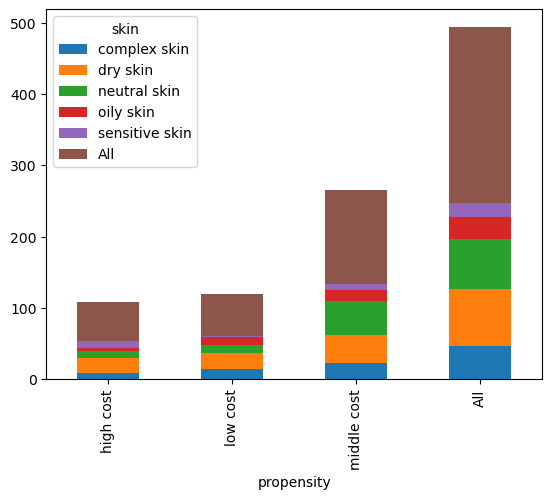

In [15]:
df['propensity'] = df['propensity'].replace([1, 2, 3], ['low cost', 'middle cost', 'high cost'])
df['skin'] = df['skin'].replace([1, 2, 3, 4, 5], ['dry skin', 'sensitive skin', 'neutral skin', 'oily skin', 'complex skin'])

ct = pd.crosstab(df.propensity, df.skin, margins=True)

ct.plot.bar(stacked=True)

In [19]:
male = df[df['gender'] == 1].satisf_al.values
female = df[df['gender'] == 2].satisf_al.values

In [20]:
stats.ttest_ind(male, female)

Ttest_indResult(statistic=-0.494589803056421, pvalue=0.6213329051985961)

<Axes: title={'center': 'satisf_al'}, xlabel='gender'>

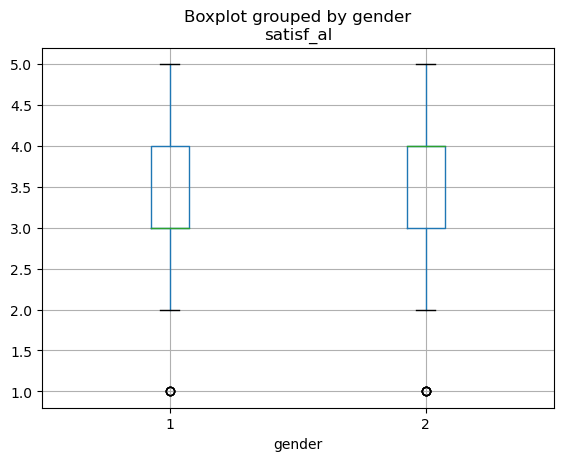

In [21]:
df.boxplot(column='satisf_al', by='gender')

<Axes: >

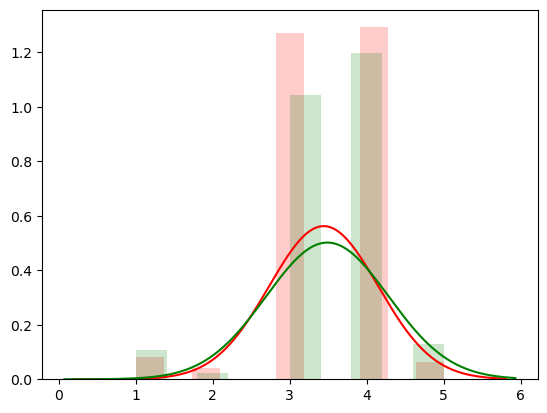

In [22]:
sns.distplot(male, kde=False, fit=stats.norm,
            hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})

sns.distplot(female, kde=False, fit=stats.norm, 
             hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})

In [23]:
stats.ttest_rel(df["satisf_b"], df["satisf_i"])

TtestResult(statistic=-7.15591640102687, pvalue=9.518854506666571e-12, df=246)

<Axes: >

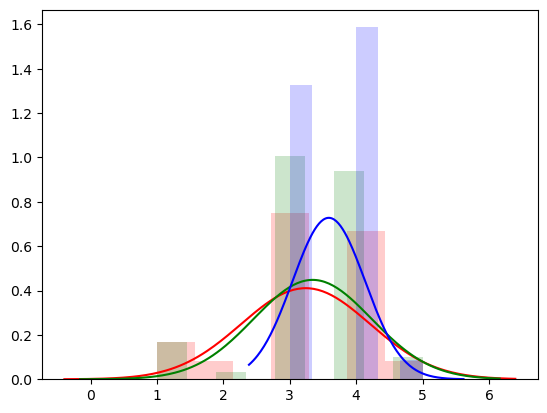

In [25]:
anova1 = df[ df['decision']==1 ].satisf_al.values
anova2 = df[ df['decision']==2 ].satisf_al.values
anova3 = df[ df['decision']==3 ].satisf_al.values


sns.distplot(anova1, kde=False, fit=sp.stats.norm, hist_kws={'color': 'r', 'alpha': 0.2}, fit_kws={'color': 'r'})
sns.distplot(anova2, kde=False, fit=sp.stats.norm, hist_kws={'color': 'g', 'alpha': 0.2}, fit_kws={'color': 'g'})
sns.distplot(anova3, kde=False, fit=sp.stats.norm, hist_kws={'color': 'b', 'alpha': 0.2}, fit_kws={'color': 'b'})

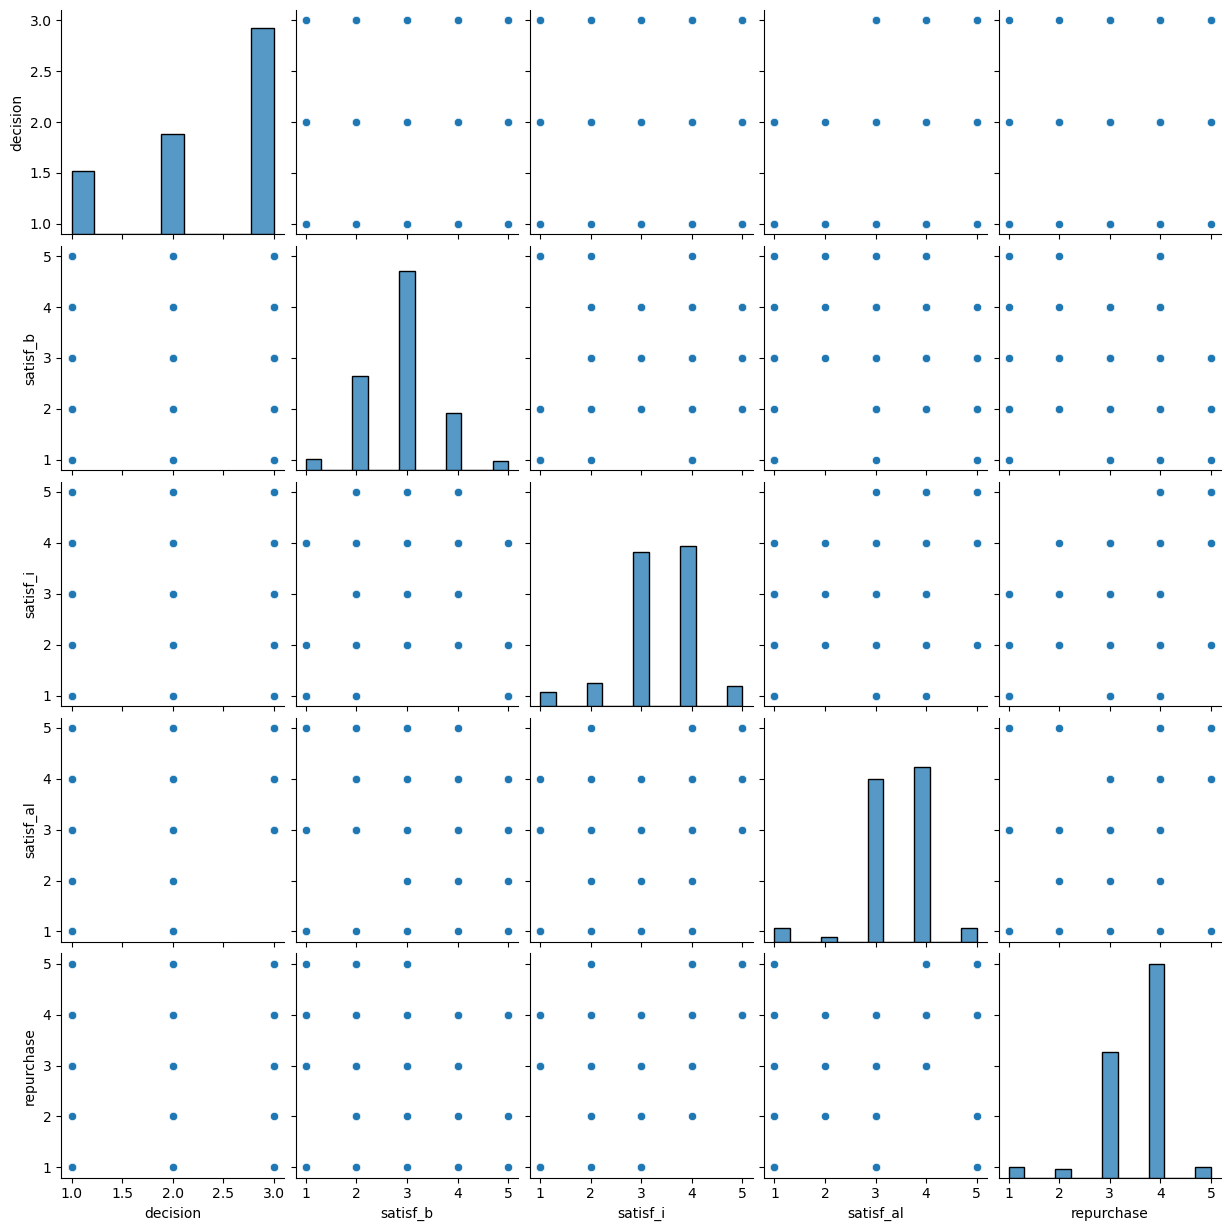

In [27]:
df_corr = df[['decision', 'satisf_b', 'satisf_i', 'satisf_al', 'repurchase']]
sns.pairplot(df_corr)

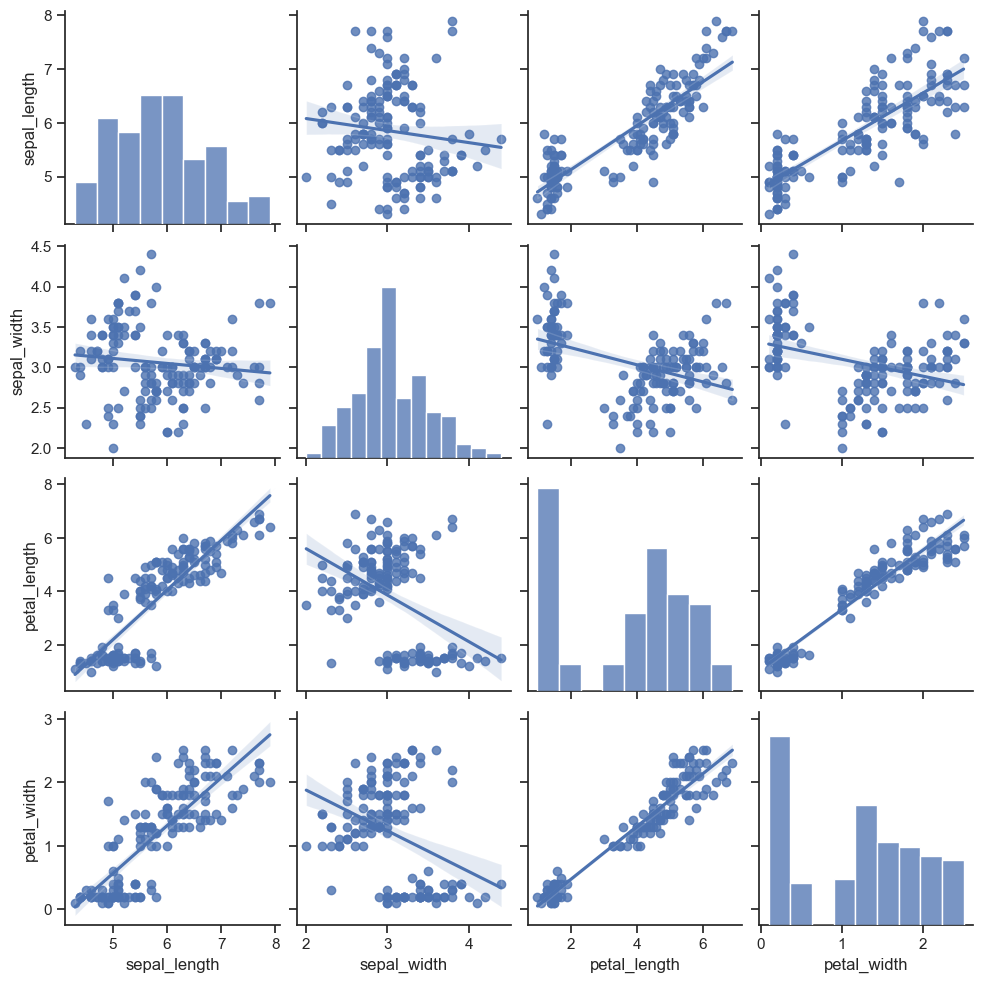

In [28]:
iris = sns.load_dataset("iris")
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, kind="reg")

In [ ]:
test